In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
from google.colab import files
uploaded=files.upload()


Saving RELIANCE.NS.csv to RELIANCE.NS.csv


In [ ]:
Rel=pd.read_csv('RELIANCE.NS.csv')
Rel

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-13,1247.900024,1260.800049,1227.500000,1232.050049,1225.264771,8047801.0
1,2019-05-14,1236.500000,1269.349976,1231.500000,1260.449951,1253.508301,13001004.0
2,2019-05-15,1273.000000,1278.000000,1250.599976,1256.900024,1249.977905,11163801.0
3,2019-05-16,1259.949951,1271.900024,1258.099976,1265.349976,1258.381348,6606652.0
4,2019-05-17,1267.000000,1276.949951,1252.000000,1267.400024,1260.420044,7898440.0
...,...,...,...,...,...,...,...
239,2020-05-05,1453.699951,1479.000000,1447.199951,1460.650024,1460.650024,20528490.0
240,2020-05-06,1464.000000,1484.949951,1445.500000,1460.750000,1460.750000,18510252.0
241,2020-05-07,1455.000000,1513.650024,1445.000000,1506.949951,1506.949951,22870646.0
242,2020-05-08,1545.000000,1579.900024,1537.099976,1561.800049,1561.800049,38522104.0


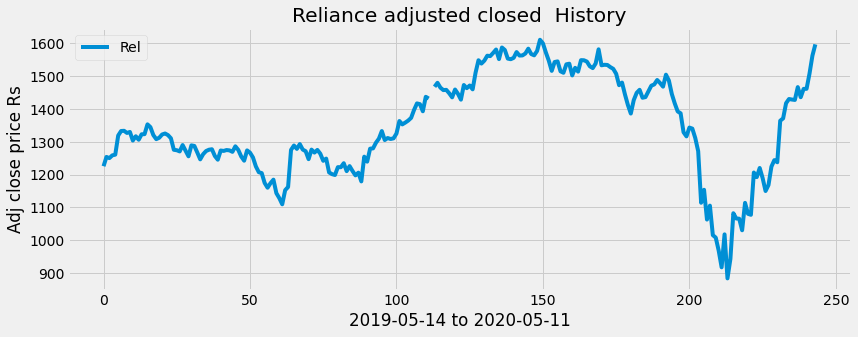

In [ ]:
#visualize the data
plt.figure(figsize=(12.5,4.5))
plt.plot(Rel['Adj Close'],label='Rel')
plt.title('Reliance adjusted closed  History')
plt.xlabel('2019-05-14 to 2020-05-11')
plt.ylabel('Adj close price Rs')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#create the simple moving  average of 30 day
SMA30=pd.DataFrame()
SMA30['Adj Close']=Rel['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
239,1195.878326
240,1212.286660
241,1231.928324
242,1250.056659


In [ ]:
#create a simple moving 100 divas average
SMA100=pd.DataFrame()
SMA100['Adj Close']=Rel['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
239,1377.381499
240,1376.439999
241,1375.783498
242,1375.781999


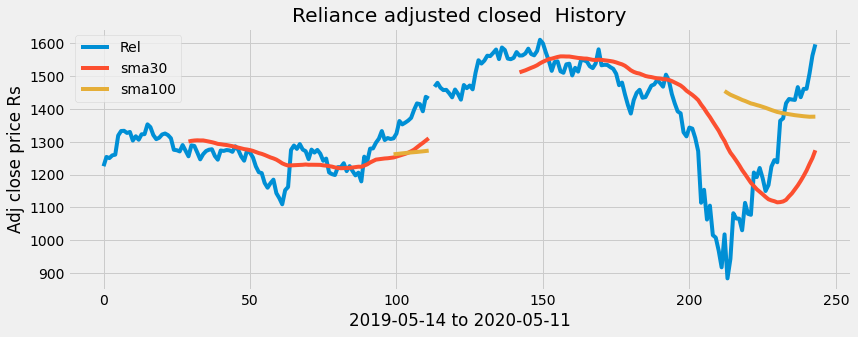

In [ ]:
#Visulaize Data
plt.figure(figsize=(12.5,4.5))
plt.plot(Rel['Adj Close'],label='Rel')
plt.plot(SMA30['Adj Close'],label='sma30')
plt.plot(SMA100['Adj Close'],label='sma100')
plt.title('Reliance adjusted closed  History')
plt.xlabel('2019-05-14 to 2020-05-11')
plt.ylabel('Adj close price Rs')
plt.legend(loc='upper left')
plt.show()


In [ ]:
data=pd.DataFrame()
data['Rel']=Rel['Adj Close']
data['SMA30']=SMA30['Adj Close']
data['SMA100']=SMA100['Adj Close']
data

,Rel,SMA30,SMA100
0,1225.264771,NaN,NaN
1,1253.508301,NaN,NaN
2,1249.977905,NaN,NaN
3,1258.381348,NaN,NaN
4,1260.420044,NaN,NaN
...,...,...,...
239,1460.650024,1195.878326,1377.381499
240,1460.750000,1212.286660,1376.439999
241,1506.949951,1231.928324,1375.783498
242,1561.800049,1250.056659,1375.781999


In [ ]:
#create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
  sigPriceBuy=[]
  sigPriceSell=[]
  flag=-1
  for i in range(len(data)):
    if data['SMA30'][i]>data['SMA100'][i]:
      if flag!=1:
        sigPriceBuy.append(data['Rel'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
    elif data['SMA30'][i]<data['SMA100'][i]:
        if flag!=0:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(data['Rel'][i])
            flag = 0
        else:
           sigPriceBuy.append(np.nan)
           sigPriceSell.append(np.nan)
    else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
  return (sigPriceBuy,sigPriceSell)          
           


In [ ]:
#store the buy and sell data
buy_sell=buy_sell(data)
data['Buy_Signal_Price']=buy_sell[0]
data['Sell_Signal_Price']=buy_sell[1]


In [ ]:
data

,Rel,SMA30,SMA100,Buy_signal_Price,Buy_Signal_Price,Sell_Signal_Price
0,1225.264771,NaN,NaN,NaN,NaN,NaN
1,1253.508301,NaN,NaN,NaN,NaN,NaN
2,1249.977905,NaN,NaN,NaN,NaN,NaN
3,1258.381348,NaN,NaN,NaN,NaN,NaN
4,1260.420044,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
239,1460.650024,1195.878326,1377.381499,1460.650024,NaN,1460.650024
240,1460.750000,1212.286660,1376.439999,1460.750000,NaN,1460.750000
241,1506.949951,1231.928324,1375.783498,1506.949951,NaN,1506.949951
242,1561.800049,1250.056659,1375.781999,1561.800049,NaN,1561.800049


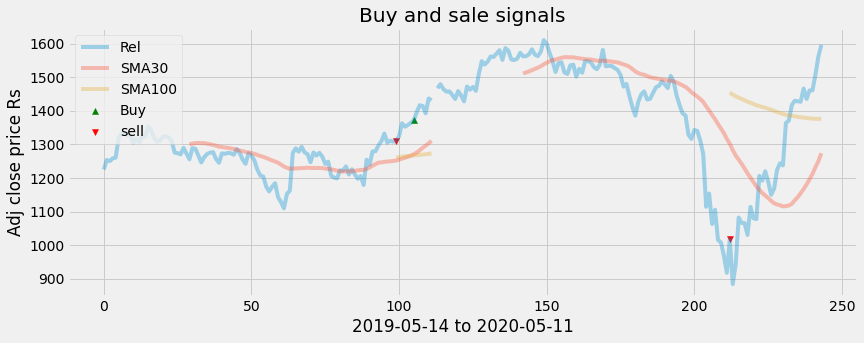

In [ ]:
#Visulaize The data and strategy 
plt.figure(figsize=(12.6,4.6))
plt.plot(data['Rel'],label='Rel',alpha=0.35)
plt.plot(data['SMA30'],label='SMA30',alpha=0.35)
plt.plot(data['SMA100'],label='SMA100',alpha=0.35)
plt.scatter(data.index,data['Buy_Signal_Price'],label='Buy',marker='^',color='green')
plt.scatter(data.index,data['Sell_Signal_Price'],label='sell',marker='v',color='red')
plt.title('Buy and sale signals')
plt.xlabel('2019-05-14 to 2020-05-11')
plt.ylabel('Adj close price Rs')
plt.legend(loc='upper left')
plt.show()
